## Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from src.data.brasil_io_json import read_json

## Carregando os dados

In [3]:
dados = read_json('../data/raw/base_brasilio.json')
dados.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
codlegislatura,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
datemissao,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
idecadastro,66179,66828,67138,68720,69871,72442,73433,73441,73460,73466,...,204555,204556,204557,204558,204559,204560,204561,204562,204563,204564
idedocumento,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
indtipodocumento,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nucarteiraparlamentar,282,355,113,175,184,145,336,347,452,460,...,41,42,43,205,217,191,71,73,78,197
nudeputadoid,3163,2917,2320,3240,2985,2924,974,993,1437,831,...,3348,3197,3293,3275,3261,3326,3242,3213,3219,3412
nulegislatura,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
numano,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
numespecificacaosubcota,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Explorando os dados

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codlegislatura             1000 non-null   int64 
 1   datemissao                 0 non-null      object
 2   idecadastro                1000 non-null   int64 
 3   idedocumento               1000 non-null   int64 
 4   indtipodocumento           1000 non-null   int64 
 5   nucarteiraparlamentar      1000 non-null   int64 
 6   nudeputadoid               1000 non-null   int64 
 7   nulegislatura              1000 non-null   int64 
 8   numano                     1000 non-null   int64 
 9   numespecificacaosubcota    1000 non-null   int64 
 10  numlote                    1000 non-null   int64 
 11  nummes                     1000 non-null   int64 
 12  numparcela                 1000 non-null   int64 
 13  numressarcimento           1000 non-null   int64 
 14  numsubcot

As principais colunas estão completas, com os 1000 dados, sem dados vazios/nulos

## Transformando os valores da coluna vlrliquido em float

In [5]:
dados['vlrliquido'] = dados['vlrliquido'].astype(float)
dados['vlrliquido']

0       0.30
1       2.36
2      22.11
3      26.39
4      10.68
       ...  
995     2.45
996     3.64
997     9.75
998     2.34
999     4.16
Name: vlrliquido, Length: 1000, dtype: float64

## Análises preliminares

In [7]:
dados['vlrliquido']

0       0.30
1       2.36
2      22.11
3      26.39
4      10.68
       ...  
995     2.45
996     3.64
997     9.75
998     2.34
999     4.16
Name: vlrliquido, Length: 1000, dtype: float64

<AxesSubplot:ylabel='vlrliquido'>

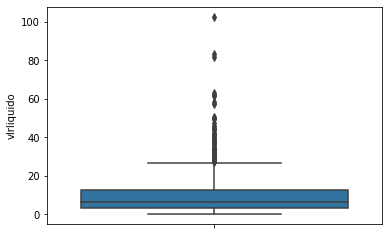

In [16]:
sns.boxplot(y=dados['vlrliquido'])

In [9]:
dados['vlrliquido'].describe()

count    1000.000000
mean        9.905630
std        10.570067
min         0.010000
25%         3.135000
50%         6.600000
75%        12.685000
max       102.540000
Name: vlrliquido, dtype: float64

In [10]:
dados.groupby(['numano'])['vlrliquido'].agg(['sum']).reset_index()

,numano,sum
0,2019,6137.72
1,2020,3767.91
